COMP 551 MiniPeoject3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random

# Task1: Acquire the data

In [ ]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
(rawtrain_X, rawtrain_y), (rawtest_X, rawtest_y) = fashion_mnist.load_data()
print("The shape of the training iamges are:", rawtrain_X.shape)
print("The shape of the training labels are:", rawtrain_y.shape)

4431872/4422102 [==============================] - 0s 0us/step
The shape of the training iamges are: (60000, 28, 28)
The shape of the training labels are: (60000,)


In [ ]:
print("The shape of the test images are:", rawtest_X.shape)
print("The shape of the test labels are:", rawtest_y.shape)

The shape of the test images are: (10000, 28, 28)
The shape of the test labels are: (10000,)


In [ ]:
np.unique(rawtrain_y) # the number of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

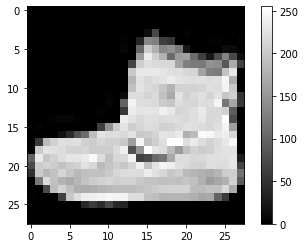

In [ ]:
plt.figure()
plt.imshow(rawtrain_X[0], cmap='gray')
plt.colorbar()

In [ ]:
train_X = rawtrain_X.reshape(rawtrain_X.shape[0], rawtrain_X.shape[1] * rawtrain_X.shape[2])
test_X = rawtest_X.reshape(rawtest_X.shape[0], rawtest_X.shape[1] * rawtest_X.shape[2])

In [ ]:
train_y = to_categorical(rawtrain_y, num_classes=10)
test_y = to_categorical(rawtest_y, num_classes=10)

In [ ]:
print("The shape of train_X:",train_X.shape)
print("The shape of train_y:", train_y.shape)
print("The shape of test_X:", test_X.shape)
print("The shape of test_y:", test_y.shape)

The shape of train_X: (60000, 784)
The shape of train_y: (60000, 10)
The shape of test_X: (10000, 784)
The shape of test_y: (10000, 10)


In [ ]:
train_X = train_X.T
train_y = train_y.T
test_X = test_X.T
test_y = test_y.T

normalizing tarin and test data:

In [ ]:
norm_train_X = train_X / 255
norm_test_X = test_X / 255

In [ ]:
train_label_count = {}
for i in range(len(np.unique(rawtrain_y))):
  train_label_count[i] = rawtrain_y.tolist().count(i)
print(train_label_count)

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [ ]:
test_label_count = {}
for i in range(len(np.unique(rawtest_y))):
  test_label_count[i] = rawtest_y.tolist().count(i)
print(test_label_count)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


# Task 2: Implement a Multilayer Perceptron

In [ ]:
class MLP:
  def __init__(self, num_inputs, num_hidden, num_outputs, act_fun, epochs, learning_rate, dropout_keeprate = 1.0):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs
    self.act_fun = act_fun
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.dropout_keeprate = dropout_keeprate

    self.num_hidden = [int(x * self.dropout_keeprate) for x in self.num_hidden]
    layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
    
    layers = [i for i in layers if i!=0]
    
    self.num_layers = len(layers)
  
  def initialization(self):
    np.random.seed(10)
    parameters = {}
    if (self.num_layers == 2):
      w1 = np.random.randn(self.num_outputs, self.num_inputs) * 0.1
      b1 = np.zeros((self.num_outputs, 1))
      parameters['w1'] = w1
      parameters['b1'] = b1
    elif(self.num_layers == 3):
      w1 = np.random.randn(self.num_hidden[0], self.num_inputs) * 0.1
      b1 = np.zeros((self.num_hidden[0], 1))
      w2 = np.random.randn(self.num_outputs, self.num_hidden[0]) * 0.1
      b2 = np.zeros((self.num_outputs, 1))
      parameters['w1'] = w1
      parameters['b1'] = b1
      parameters['w2'] = w2
      parameters['b2'] = b2
    elif(self.num_layers == 4):
      w1 = np.random.randn(self.num_hidden[0], self.num_inputs) * 0.1
      b1 = np.zeros((self.num_hidden[0], 1))
      w2 = np.random.randn(self.num_hidden[1], self.num_hidden[0]) * 0.1
      b2 = np.zeros((self.num_hidden[1], 1))
      w3 = np.random.randn(self.num_outputs, self.num_hidden[1]) * 0.1
      b3 = np.zeros((self.num_outputs, 1))
      parameters['w1'] = w1
      parameters['b1'] = b1
      parameters['w2'] = w2
      parameters['b2'] = b2
      parameters['w3'] = w3
      parameters['b3'] = b3
    
    return parameters
            

  def forward_prop(self, inputs, parameters):
    outputs = {}
    if (self.num_layers == 2):
      w1 = parameters['w1']
      b1 = parameters['b1']
      z1 = np.dot(w1, inputs) + b1
      a1 = self.softmax(z1)
      outputs["z1"] = z1
      outputs["a1"] = a1
    elif (self.num_layers == 3):
      w1 = parameters['w1']
      b1 = parameters['b1']
      w2 = parameters['w2']
      b2 = parameters['b2']
      z1 = np.dot(w1, inputs) + b1
      if(self.act_fun.upper() == "relu".upper()):
        a1 = self.relu(z1)
      elif(self.act_fun.upper() == "tanh".upper()):
        a1 = self.tanh(z1)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        a1 = self.leakyrelu(z1)
      z2 = np.dot(w2, a1) + b2
      a2 = self.softmax(z2)
      outputs["z1"] = z1
      outputs["a1"] = a1
      outputs["z2"] = z2
      outputs["a2"] = a2
    elif(self.num_layers == 4):
      w1 = parameters['w1']
      b1 = parameters['b1']
      w2 = parameters['w2']
      b2 = parameters['b2']
      w3 = parameters['w3']
      b3 = parameters['b3']
      z1 = np.dot(w1, inputs) + b1
      if(self.act_fun.upper() == "relu".upper()):
        a1 = self.relu(z1)
      elif(self.act_fun.upper() == "tanh".upper()):
        a1 = self.tanh(z1)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        a1 = self.leakyrelu(z1)
      z2 = np.dot(w2, a1) + b2
      if(self.act_fun.upper() == "relu".upper()):
        a2 = self.relu(z2)
      elif(self.act_fun.upper() == "tanh".upper()):
        a2 = self.tanh(z2)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        a2 = self.leakyrelu(z2)
      z3 = np.dot(w3, a2) + b3
      a3 = self.softmax(z3)
      outputs["z1"] = z1
      outputs["a1"] = a1
      outputs["z2"] = z2
      outputs["a2"] = a2
      outputs["z3"] = z3
      outputs["a3"] = a3
    return outputs
  
  def backward_prop(self, inputs, targets, parameters, outputs):
    gradients = {}
    m = self.num_inputs
    if (self.num_layers == 2):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      a1 = outputs["a1"]
      dz1 = (a1-targets)
      dw1 = (1/m) * np.dot(dz1, inputs.T)
      db1 = (1/m) * np.sum(dz1, axis = 1, keepdims=True)
      gradients["dw1"] = dw1
      gradients["db1"] = db1
    elif (self.num_layers == 3):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      w2 = parameters["w2"]
      b2 = parameters["b2"]
      a1 = outputs["a1"]
      a2 = outputs["a2"]
      dz2 = (a2 - targets)
      dw2 = (1/m) * np.dot(dz2, a1.T) 
      db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)
      if(self.act_fun.upper() == "relu".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_relu(a1)
      elif(self.act_fun.upper() == "tanh".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_tanh(a1)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_leakyrelu(a1)
      dw1 = (1/m) * np.dot(dz1, inputs.T)
      db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)
      gradients["dw1"] = dw1
      gradients["db1"] = db1
      gradients["dw2"] = dw2
      gradients["db2"] = db2
    elif (self.num_layers == 4):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      w2 = parameters["w2"]
      b2 = parameters["b2"]
      w3 = parameters["w3"]
      b3 = parameters["b3"]
      a1 = outputs["a1"]
      a2 = outputs["a2"]
      a3 = outputs["a3"]
      dz3 = (a3 - targets)
      dw3 = (1/m) * np.dot(dz3, a2.T)
      db3 = (1/m) * np.sum(dz3, axis = 1, keepdims = True)
      if(self.act_fun.upper() == "relu".upper()):
        dz2 = (1/m) * np.dot(w3.T, dz3) * self.derivative_relu(a2)
      elif(self.act_fun.upper() == "tanh".upper()):
        dz2 = (1/m) * np.dot(w3.T, dz3) * self.derivative_tanh(a2)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        dz2 = (1/m) * np.dot(w3.T, dz3) * self.derivative_leakyrelu(a2)
      dw2 = (1/m) * np.dot(dz2, a1.T)
      db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)
      if(self.act_fun.upper() == "relu".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_relu(a1)
      elif(self.act_fun.upper() == "tanh".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_tanh(a1)
      elif(self.act_fun.upper() == "leakyrelu".upper()):
        dz1 = (1/m) * np.dot(w2.T, dz2) * self.derivative_leakyrelu(a1)
      dw1 = (1/m) * np.dot(dz1, inputs.T)
      db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)
      gradients["dw1"] = dw1
      gradients["db1"] = db1
      gradients["dw2"] = dw2
      gradients["db2"] = db2
      gradients["dw3"] = dw3
      gradients["db3"] = db3
    return gradients

  def gradient_descent(self, parameters, gradients):
    update_parameters = {}
    if (self.num_layers == 2):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      dw1 = gradients["dw1"]
      db1 = gradients["db1"]
      w1 -= self.learning_rate * dw1
      b1 -= self.learning_rate * db1
      update_parameters["w1"] = w1
      update_parameters["b1"] = b1
    elif (self.num_layers == 3):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      w2 = parameters["w2"]
      b2 = parameters["b2"]
      dw1 = gradients["dw1"]
      db1 = gradients["db1"]
      dw2 = gradients["dw2"]
      db2 = gradients["db2"]
      w1 -= self.learning_rate * dw1
      b1 -= self.learning_rate * db1
      w2 -= self.learning_rate * dw2
      b2 -= self.learning_rate * db2
      update_parameters["w1"] = w1
      update_parameters["b1"] = b1
      update_parameters["w2"] = w2
      update_parameters["b2"] = b2
    elif (self.num_layers == 4):
      w1 = parameters["w1"]
      b1 = parameters["b1"]
      w2 = parameters["w2"]
      b2 = parameters["b2"]
      w3 = parameters["w3"]
      b3 = parameters["b3"]
      dw1 = gradients["dw1"]
      db1 = gradients["db1"]
      dw2 = gradients["dw2"]
      db2 = gradients["db2"]
      dw3 = gradients["dw3"]
      db3 = gradients["db3"]
      w1 -= self.learning_rate * dw1
      b1 -= self.learning_rate * db1
      w2 -= self.learning_rate * dw2
      b2 -= self.learning_rate * db2
      w3 -= self.learning_rate * dw3
      b3 -= self.learning_rate * db3
      update_parameters["w1"] = w1
      update_parameters["b1"] = b1
      update_parameters["w2"] = w2
      update_parameters["b2"] = b2
      update_parameters["w3"] = w3
      update_parameters["b3"] = b3
    return update_parameters

  def fit(self, inputs, targets):
    cost_list=[]
    parameters = self.initialization()
    for i in range(self.epochs):
      outputs = self.forward_prop(inputs, parameters)
      if (self.num_layers == 2):
        cost = self.cost(outputs['a1'], targets)
      elif (self.num_layers == 3):
        cost = self.cost(outputs['a2'], targets)
      elif (self.num_layers == 4):
        cost = self.cost(outputs['a3'], targets)
      gradients = self.backward_prop(inputs, targets, parameters, outputs)
      parameters = self.gradient_descent(parameters, gradients)
      cost_list.append(cost)
      if (i % (self.epochs/10) == 0):
        print("Cost after", i, "iteration is:", cost)
      
    return parameters, cost_list
  
  def predict(self, inputs, parameters):
    outputs = self.forward_prop(inputs, parameters)
    if (self.num_layers == 2):
      a_out = outputs['a1']
    elif (self.num_layers == 3):
      a_out = outputs['a2']
    elif (self.num_layers == 4):
      a_out = outputs['a3']
    a_out = np.argmax(a_out, 0)
    return a_out 
  
  def evaluate_acc(self, parameters, inputs, labels):
    a_out = self.predict(inputs, parameters)
    labels = np.argmax(labels, 0)
    acc = np.mean(a_out == labels) * 100
    return acc

  def cost(self, output, target):
    m = self.num_outputs
    cost = -(1/m)*np.sum(target*np.log(output))
    return cost

  def relu(self, x):
    return np.maximum(x,0)
  
  def softmax(self, x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=0)
  
  def tanh(self, x):
    return np.tanh(x)

  def leakyrelu(self, x, alpha=0.01):
    return np.maximum(x,0) + alpha * np.minimum(x,0)

  def derivative_tanh(self,x):
    return (1-np.power(np.tanh(x), 2))

  def derivative_relu(self, x):
    return np.array(x > 0, dtype=float)

  def derivative_leakyrelu(self, x, alpha=0.01):
    return np.clip(x > 0 , alpha, 1.0)



# Task 3: Run the experiments

In [ ]:
from sklearn.model_selection import GridSearchCV


Q1-(1): an MLP with no hidden layers

In [ ]:
mlp = MLP(784, [0], 10, act_fun='relu', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 17047.440103026867


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:274: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:274: RuntimeWarning: invalid value encountered in multiply


Cost after 10 iteration is: nan
Cost after 20 iteration is: 188241.8296528203
Cost after 30 iteration is: 100310.00986761568
Cost after 40 iteration is: 286735.632045194
Cost after 50 iteration is: 246782.5347581564
Cost after 60 iteration is: 156665.86681572278
Cost after 70 iteration is: 133311.65226884512
Cost after 80 iteration is: 303210.4169383803
Cost after 90 iteration is: 115528.89983982989
The train accruacy is 67.59833333333334
The test accuracy is 66.45


Q1-(2): an MLP with a single hidden layer having 128 units and ReLU activations

In [ ]:
mlp = MLP(784, [128], 10, act_fun='relu', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15977.29734054028
Cost after 10 iteration is: 5919.948413031368
Cost after 20 iteration is: 4785.156081126072
Cost after 30 iteration is: 4342.797552251962
Cost after 40 iteration is: 4574.337841087333
Cost after 50 iteration is: 4163.303187265375
Cost after 60 iteration is: 4010.011077329607
Cost after 70 iteration is: 3895.981750864858
Cost after 80 iteration is: 3800.401777811623
Cost after 90 iteration is: 3719.982580892367
The train accruacy is 77.98
The test accuracy is 76.86


Q1-(3): an MLP with 2 hidden layers each having 128 units with ReLU activations

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14630.37274952446
Cost after 10 iteration is: 6028.304099364451
Cost after 20 iteration is: 4992.121455232766
Cost after 30 iteration is: 4602.343974118573
Cost after 40 iteration is: 4372.863552354705
Cost after 50 iteration is: 4213.831725076664
Cost after 60 iteration is: 4094.9614059254295
Cost after 70 iteration is: 4349.516848013037
Cost after 80 iteration is: 4159.815800177595
Cost after 90 iteration is: 4035.187968542564
The train accruacy is 76.28666666666668
The test accuracy is 75.2


Q2: an MLP with 2 hidden layers each having 128 units with tanh activations

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 11109.443590782143
Cost after 20 iteration is: 5723.024412320851
Cost after 30 iteration is: 4932.549840669002
Cost after 40 iteration is: 4416.028456472478
Cost after 50 iteration is: 4116.3706222862675
Cost after 60 iteration is: 3917.9299924054694
Cost after 70 iteration is: 3773.5042745965497
Cost after 80 iteration is: 3664.1160521074994
Cost after 90 iteration is: 3577.184971337161
The train accruacy is 78.89333333333333
The test accuracy is 77.7


Q2: an MLP with 2 hidden layers each having 128 units with Leaky-ReLU activations

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='leakyrelu', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14620.088351232711
Cost after 10 iteration is: 5970.949852522295
Cost after 20 iteration is: 4960.75837510531
Cost after 30 iteration is: 4573.785213115373
Cost after 40 iteration is: 4346.329493571487
Cost after 50 iteration is: 4188.65572047622
Cost after 60 iteration is: 4070.4181066007495
Cost after 70 iteration is: 3980.487938014052
Cost after 80 iteration is: 4288.351126235781
Cost after 90 iteration is: 4006.0011081869884
The train accruacy is 77.40666666666667
The test accuracy is 76.73


Q3: an MLP with 2 hidden layers each having 128 units with ReLU activations, adding dropout regularization.

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1, dropout_keeprate=0.9)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15185.964458294842
Cost after 10 iteration is: 6779.317838032844
Cost after 20 iteration is: 5573.694359930276
Cost after 30 iteration is: 5080.048635702795
Cost after 40 iteration is: 4781.712174491879
Cost after 50 iteration is: 4574.733409434987
Cost after 60 iteration is: 4851.668094296523
Cost after 70 iteration is: 4780.974874294385
Cost after 80 iteration is: 4560.657251682659
Cost after 90 iteration is: 4448.87406697282
The train accruacy is 73.9
The test accuracy is 73.03


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1, dropout_keeprate=0.8)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14680.58361517955
Cost after 10 iteration is: 8568.694175673189
Cost after 20 iteration is: 6121.953754301621
Cost after 30 iteration is: 5416.920086198611
Cost after 40 iteration is: 5037.7433474172185
Cost after 50 iteration is: 4790.724628147053
Cost after 60 iteration is: 4618.696758263225
Cost after 70 iteration is: 4492.428458563437
Cost after 80 iteration is: 4929.3994844536255
Cost after 90 iteration is: 4599.524359086954
The train accruacy is 72.67833333333333
The test accuracy is 71.67


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1, dropout_keeprate=0.7)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15066.819499193785
Cost after 10 iteration is: 6271.099601474017
Cost after 20 iteration is: 5259.059973932678
Cost after 30 iteration is: 4846.349183401406
Cost after 40 iteration is: 5405.683089618898
Cost after 50 iteration is: 4989.588669436147
Cost after 60 iteration is: 4788.108201668495
Cost after 70 iteration is: 4668.563792385918
Cost after 80 iteration is: 4579.068279082884
Cost after 90 iteration is: 4503.667603398374
The train accruacy is 73.02499999999999
The test accuracy is 72.1


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1, dropout_keeprate=0.6)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15073.612564188472
Cost after 10 iteration is: 7192.134124206228
Cost after 20 iteration is: 5804.017670666799
Cost after 30 iteration is: 5226.933588660878
Cost after 40 iteration is: 4896.726726998396
Cost after 50 iteration is: 4681.85760098107
Cost after 60 iteration is: 4971.839997283736
Cost after 70 iteration is: 5072.686829577884
Cost after 80 iteration is: 4750.124309908763
Cost after 90 iteration is: 4600.400683416493
The train accruacy is 72.40833333333333
The test accuracy is 72.16


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1, dropout_keeprate=0.5)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14342.886218581314
Cost after 10 iteration is: 7488.519266418666
Cost after 20 iteration is: 6290.525165931461
Cost after 30 iteration is: 5834.875248407675
Cost after 40 iteration is: 5521.8084753476405
Cost after 50 iteration is: 5308.938715578817
Cost after 60 iteration is: 5152.672550542195
Cost after 70 iteration is: 5033.99109592843
Cost after 80 iteration is: 4937.438681172241
Cost after 90 iteration is: 4855.53059614474
The train accruacy is 71.055
The test accuracy is 70.73


Q4: an MLP with 2 hidden layers each having 128 units with ReLU activations, using unnormalized images

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='relu', epochs=100, learning_rate=0.1)
parameters, cost_list = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, test_X, test_y))

Cost after 0 iteration is: 14630.37274952446
Cost after 10 iteration is: 6028.304099364451
Cost after 20 iteration is: 4992.121455232766
Cost after 30 iteration is: 4602.343974118573
Cost after 40 iteration is: 4372.863552354705
Cost after 50 iteration is: 4213.831725076664
Cost after 60 iteration is: 4094.9614059254295
Cost after 70 iteration is: 4349.516848013037
Cost after 80 iteration is: 4159.815800177595
Cost after 90 iteration is: 4035.187968542564
The train accruacy is 52.129999999999995
The test accuracy is 51.41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:281: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:282: RuntimeWarning: invalid value encountered in true_divide


Q6: the best MLP model(changing learning rate and increasing iterations)

MLP with two hidden layers

In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.16)
parameters, cost_list_2016 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 267067.2594783816
Cost after 20 iteration is: 58015.72060149343
Cost after 30 iteration is: 18729.759358007617
Cost after 40 iteration is: 13105.280344241291
Cost after 50 iteration is: 10492.480633831105
Cost after 60 iteration is: 6508.146453197303
Cost after 70 iteration is: 7262.644875240549
Cost after 80 iteration is: 8291.118274225852
Cost after 90 iteration is: 7877.581589999526
The train accruacy is 74.64833333333334
The test accuracy is 73.7


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.15)
parameters, cost_list_2015 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 33989.80883076697
Cost after 20 iteration is: 10036.381875588979
Cost after 30 iteration is: 7047.152154043998
Cost after 40 iteration is: 5793.826554019312
Cost after 50 iteration is: 5169.517589035762
Cost after 60 iteration is: 5038.6385958010105
Cost after 70 iteration is: 4235.96836886712
Cost after 80 iteration is: 4778.5143476225785
Cost after 90 iteration is: 4168.455305985782
The train accruacy is 76.37333333333333
The test accuracy is 75.03


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.14)
parameters, cost_list_2014 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 73023.45441955094
Cost after 20 iteration is: 8427.700070169745
Cost after 30 iteration is: 5825.274381999134
Cost after 40 iteration is: 4932.772754093095
Cost after 50 iteration is: 6022.797252128814
Cost after 60 iteration is: 4502.371255042742
Cost after 70 iteration is: 4355.900176369311
Cost after 80 iteration is: 4124.64002088725
Cost after 90 iteration is: 4039.785829569505
The train accruacy is 77.27166666666668
The test accuracy is 75.99000000000001


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.13)
parameters, cost_list_2013 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 7412.113033208106
Cost after 20 iteration is: 6366.859862860445
Cost after 30 iteration is: 4983.619820482247
Cost after 40 iteration is: 4551.095427635333
Cost after 50 iteration is: 4288.907161887342
Cost after 60 iteration is: 4100.260707175098
Cost after 70 iteration is: 3966.648130204492
Cost after 80 iteration is: 4008.8379529343338
Cost after 90 iteration is: 4006.881003790493
The train accruacy is 77.92999999999999
The test accuracy is 76.78


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.12)
parameters, cost_list_2012 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 7860.2242124190325
Cost after 20 iteration is: 6151.1507185047
Cost after 30 iteration is: 4915.318945338971
Cost after 40 iteration is: 4478.223316144357
Cost after 50 iteration is: 4222.869443641537
Cost after 60 iteration is: 4036.6811280316324
Cost after 70 iteration is: 3899.2429562506813
Cost after 80 iteration is: 3826.272335283082
Cost after 90 iteration is: 4251.94588570337
The train accruacy is 78.03166666666667
The test accuracy is 76.75


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.11)
parameters, cost_list_2011 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 11056.546789291177
Cost after 20 iteration is: 6145.970256635572
Cost after 30 iteration is: 5140.556886201368
Cost after 40 iteration is: 4513.360777114471
Cost after 50 iteration is: 4174.909287619525
Cost after 60 iteration is: 3959.837344996991
Cost after 70 iteration is: 3812.352550412421
Cost after 80 iteration is: 3703.874754299362
Cost after 90 iteration is: 3620.709146899258
The train accruacy is 79.13666666666667
The test accuracy is 78.23


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.10)
parameters, cost_list_2010 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 11109.443590782143
Cost after 20 iteration is: 5723.024412320851
Cost after 30 iteration is: 4932.549840669002
Cost after 40 iteration is: 4416.028456472478
Cost after 50 iteration is: 4116.3706222862675
Cost after 60 iteration is: 3917.9299924054694
Cost after 70 iteration is: 3773.5042745965497
Cost after 80 iteration is: 3664.1160521074994
Cost after 90 iteration is: 3577.184971337161
The train accruacy is 78.89333333333333
The test accuracy is 77.7


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.09)
parameters, cost_list_2009 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 14325.067337463119
Cost after 20 iteration is: 6413.865338040271
Cost after 30 iteration is: 5001.236547021426
Cost after 40 iteration is: 4411.045104622522
Cost after 50 iteration is: 4068.081086563306
Cost after 60 iteration is: 3852.3993132086384
Cost after 70 iteration is: 3706.4737614310384
Cost after 80 iteration is: 3601.2877183415508
Cost after 90 iteration is: 3521.799264745756
The train accruacy is 79.64333333333333
The test accuracy is 78.59


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.08)
parameters, cost_list_2008 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 10165.15079104613
Cost after 20 iteration is: 6231.980742022279
Cost after 30 iteration is: 5431.655935581622
Cost after 40 iteration is: 4621.250573246868
Cost after 50 iteration is: 4218.517896864894
Cost after 60 iteration is: 3955.8623534982785
Cost after 70 iteration is: 3777.2018156938557
Cost after 80 iteration is: 3649.4921710473027
Cost after 90 iteration is: 3554.204015761854
The train accruacy is 79.43
The test accuracy is 78.53


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.07)
parameters, cost_list_2007 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 13678.005319736498
Cost after 20 iteration is: 8398.169421060298
Cost after 30 iteration is: 5027.231915032804
Cost after 40 iteration is: 5114.6043980898785
Cost after 50 iteration is: 4457.465542890354
Cost after 60 iteration is: 4135.064695913949
Cost after 70 iteration is: 3902.3294285127313
Cost after 80 iteration is: 3738.194627645047
Cost after 90 iteration is: 3617.675656109275
The train accruacy is 79.39666666666668
The test accuracy is 78.36


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.06)
parameters, cost_list_2006 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 18499.93282611812
Cost after 20 iteration is: 5337.905147705366
Cost after 30 iteration is: 5625.172746165327
Cost after 40 iteration is: 5214.631198933501
Cost after 50 iteration is: 4960.5636868002675
Cost after 60 iteration is: 4423.199015635078
Cost after 70 iteration is: 4177.5193107468285
Cost after 80 iteration is: 3971.6827855431493
Cost after 90 iteration is: 3825.834961722453
The train accruacy is 78.855
The test accuracy is 78.06


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.05)
parameters, cost_list_2005 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 18334.136356734372
Cost after 20 iteration is: 13137.743305472393
Cost after 30 iteration is: 7107.80023452153
Cost after 40 iteration is: 5846.412077635291
Cost after 50 iteration is: 5823.700049286313
Cost after 60 iteration is: 4668.941768476034
Cost after 70 iteration is: 5131.072899206554
Cost after 80 iteration is: 4320.296279708861
Cost after 90 iteration is: 4491.699433041688
The train accruacy is 77.91166666666666
The test accuracy is 77.27000000000001


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.04)
parameters, cost_list_2004 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 25784.532539634343
Cost after 20 iteration is: 11880.497080022647
Cost after 30 iteration is: 7355.066313042684
Cost after 40 iteration is: 5221.475662971396
Cost after 50 iteration is: 7793.279016569919
Cost after 60 iteration is: 6889.48773852539
Cost after 70 iteration is: 4636.516343423708
Cost after 80 iteration is: 5964.182756122047
Cost after 90 iteration is: 5482.5493550923675
The train accruacy is 76.36500000000001
The test accuracy is 75.29


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.03)
parameters, cost_list_2003 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 41539.212386367435
Cost after 20 iteration is: 10137.0760166885
Cost after 30 iteration is: 4601.693458728509
Cost after 40 iteration is: 8323.957135773862
Cost after 50 iteration is: 6656.485979900615
Cost after 60 iteration is: 5504.560800113848
Cost after 70 iteration is: 5540.730134001554
Cost after 80 iteration is: 4028.244750323469
Cost after 90 iteration is: 5095.605651507564
The train accruacy is 76.00833333333334
The test accuracy is 75.02


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.02)
parameters, cost_list_2002 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 11617.848438985731
Cost after 20 iteration is: 8990.706054268469
Cost after 30 iteration is: 6224.781560345071
Cost after 40 iteration is: 4804.978145150466
Cost after 50 iteration is: 5770.665649835713
Cost after 60 iteration is: 5893.840674800962
Cost after 70 iteration is: 5494.606934230294
Cost after 80 iteration is: 4962.582931984703
Cost after 90 iteration is: 5198.119386831296
The train accruacy is 73.15333333333334
The test accuracy is 72.3


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.01)
parameters, cost_list_2001 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 7000.497734050021
Cost after 20 iteration is: 6164.318744855265
Cost after 30 iteration is: 5450.756023661621
Cost after 40 iteration is: 5006.319356404454
Cost after 50 iteration is: 4702.304142464856
Cost after 60 iteration is: 4735.016164155829
Cost after 70 iteration is: 4613.79327775766
Cost after 80 iteration is: 4481.088551876465
Cost after 90 iteration is: 4372.625883947882
The train accruacy is 73.81166666666667
The test accuracy is 72.39


In [ ]:
mlp = MLP(784, [128, 128], 10, act_fun='tanh', epochs=100, learning_rate=0.001)
parameters, cost_list_20001 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 14353.550037695191
Cost after 10 iteration is: 11529.216746281827
Cost after 20 iteration is: 10212.613428547897
Cost after 30 iteration is: 9324.926346689423
Cost after 40 iteration is: 8676.767620185376
Cost after 50 iteration is: 8179.170971229245
Cost after 60 iteration is: 7782.562407579774
Cost after 70 iteration is: 7457.262115089317
Cost after 80 iteration is: 7184.424672527267
Cost after 90 iteration is: 6951.484952632706
The train accruacy is 66.13666666666667
The test accuracy is 65.36999999999999


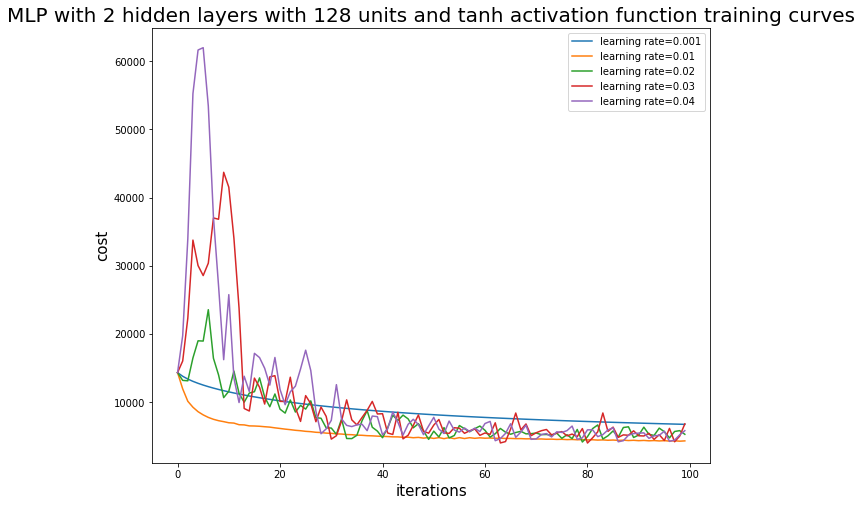

In [ ]:
x = list(range(0,100))
plt.figure(figsize=(10, 8))
plt.plot(x, cost_list_20001)
plt.plot(x, cost_list_2001)
plt.plot(x, cost_list_2002)
plt.plot(x, cost_list_2003)
plt.plot(x, cost_list_2004)
plt.xlabel("iterations", fontsize=15)
plt.ylabel("cost", fontsize=15)
plt.title("MLP with 2 hidden layers with 128 units and tanh activation function training curves", fontsize=20)
plt.legend(['learning rate=0.001', 'learning rate=0.01','learning rate=0.02','learning rate=0.03','learning rate=0.04'])

Text(0.5, 1.0, 'train accuracy/test accuracy v.s. learning rate(2 hidden layers MLP)')

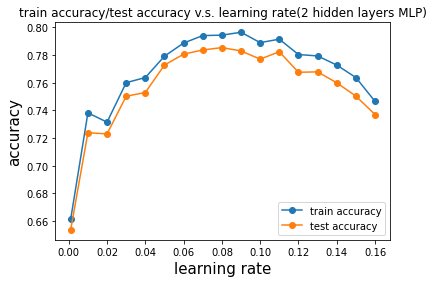

In [ ]:
lr2 = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]
trainacc2 = [0.6614, 0.7382, 0.7315, 0.7600, 0.7637, 0.7791, 0.7886, 0.7940, 0.7943, 0.7964, 0.7889, 0.7914, 0.7803, 0.7793, 0.7727, 0.7637, 0.7465]
testacc2 = [0.6537, 0.7239, 0.723, 0.7502, 0.7529, 0.7727, 0.7806, 0.7836, 0.7853, 0.7829, 0.777, 0.7823, 0.7675, 0.7678, 0.7599, 0.7503, 0.737]
plt.plot(lr2, trainacc2, marker='o', label='train accuracy')
plt.plot(lr2, testacc2, marker='o', label='test accuracy')
plt.legend()
plt.xlabel('learning rate', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('train accuracy/test accuracy v.s. learning rate(2 hidden layers MLP)')

MLP with one hidden layer

In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.15)
print("The train accruacy is", mlp.eparameters, cost_list_1015 = mlp.fit(norm_train_X, train_y)
aluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 313851.35684143816
Cost after 20 iteration is: 336244.5641292622
Cost after 30 iteration is: 44943.91895838265
Cost after 40 iteration is: 18183.424612093975
Cost after 50 iteration is: 14014.293677828575
Cost after 60 iteration is: 13635.384419210743
Cost after 70 iteration is: 11209.48923075603
Cost after 80 iteration is: 9772.992924309227
Cost after 90 iteration is: 8087.407354194859
The train accruacy is 74.78333333333333
The test accuracy is 74.21


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.14)
parameters, cost_list_1014 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 364784.34690771665
Cost after 20 iteration is: 76072.4216978587
Cost after 30 iteration is: 13918.940124705181
Cost after 40 iteration is: 7731.200762488947
Cost after 50 iteration is: 7206.312352781577
Cost after 60 iteration is: 10685.702495090598
Cost after 70 iteration is: 6265.247849483983
Cost after 80 iteration is: 5354.861160385604
Cost after 90 iteration is: 4329.518673904539
The train accruacy is 73.605
The test accuracy is 72.64


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.13)
parameters, cost_list_1013 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 98291.15611731293
Cost after 20 iteration is: 44369.72023768478
Cost after 30 iteration is: 12149.335969697247
Cost after 40 iteration is: 7190.872353425322
Cost after 50 iteration is: 6049.238240133201
Cost after 60 iteration is: 5691.347735538193
Cost after 70 iteration is: 5211.329294171699
Cost after 80 iteration is: 4743.091449196428
Cost after 90 iteration is: 4512.290356032165
The train accruacy is 76.28333333333333
The test accuracy is 75.16000000000001


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.12)
parameters, cost_list_1012 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 20414.424406646358
Cost after 20 iteration is: 7687.079171201654
Cost after 30 iteration is: 5968.837813218031
Cost after 40 iteration is: 5207.581156496154
Cost after 50 iteration is: 4829.8384926867
Cost after 60 iteration is: 5204.055262341208
Cost after 70 iteration is: 6039.455324533432
Cost after 80 iteration is: 4417.12494221594
Cost after 90 iteration is: 4161.501212225844
The train accruacy is 77.10333333333334
The test accuracy is 75.41


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.11)
parameters, cost_list_1011 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 11727.37289273794
Cost after 20 iteration is: 6502.214526237825
Cost after 30 iteration is: 4987.651930788724
Cost after 40 iteration is: 4499.794082687305
Cost after 50 iteration is: 4203.422531634494
Cost after 60 iteration is: 3971.481193834429
Cost after 70 iteration is: 3916.9809093157146
Cost after 80 iteration is: 4066.1391917283445
Cost after 90 iteration is: 3811.692082786187
The train accruacy is 78.95166666666667
The test accuracy is 77.58


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.10)
parameters, cost_list_1010 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 8163.516984050775
Cost after 20 iteration is: 6422.293611344767
Cost after 30 iteration is: 5054.005064438038
Cost after 40 iteration is: 4484.4641266270755
Cost after 50 iteration is: 4135.427656582402
Cost after 60 iteration is: 4052.9413307413192
Cost after 70 iteration is: 3862.9831024625696
Cost after 80 iteration is: 3641.603442625529
Cost after 90 iteration is: 3615.8580324714612
The train accruacy is 78.73833333333333
The test accuracy is 77.36


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.09)
parameters, cost_list_1009 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 15225.56527912055
Cost after 20 iteration is: 6445.424037136336
Cost after 30 iteration is: 4655.482076575087
Cost after 40 iteration is: 4078.962364654076
Cost after 50 iteration is: 3918.075316538303
Cost after 60 iteration is: 4098.459696654819
Cost after 70 iteration is: 3734.9050696453396
Cost after 80 iteration is: 3643.0493135662714
Cost after 90 iteration is: 3499.3894706310293
The train accruacy is 79.91166666666668
The test accuracy is 79.05


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.08)
parameters, cost_list_1008 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 8889.60459568074
Cost after 20 iteration is: 7795.305664808609
Cost after 30 iteration is: 4729.366812000763
Cost after 40 iteration is: 4555.743400850987
Cost after 50 iteration is: 4096.286769445486
Cost after 60 iteration is: 3792.2980446206675
Cost after 70 iteration is: 3615.4920057943405
Cost after 80 iteration is: 3492.196609477643
Cost after 90 iteration is: 3417.5667577279924
The train accruacy is 80.16166666666666
The test accuracy is 78.74


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.07)
parameters, cost_list_1007 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 9346.863701460814
Cost after 20 iteration is: 6667.467627316075
Cost after 30 iteration is: 5588.495532065906
Cost after 40 iteration is: 4489.246353603447
Cost after 50 iteration is: 4125.575838416137
Cost after 60 iteration is: 3834.3810733484374
Cost after 70 iteration is: 3620.2517507326384
Cost after 80 iteration is: 3466.8089557320136
Cost after 90 iteration is: 3366.1956233936553
The train accruacy is 81.09333333333333
The test accuracy is 79.83


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.06)
parameters, cost_list_1006 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 12673.854268836501
Cost after 20 iteration is: 6065.117781004539
Cost after 30 iteration is: 5805.668291550475
Cost after 40 iteration is: 4411.5226154370375
Cost after 50 iteration is: 3877.9489437482234
Cost after 60 iteration is: 3832.28832407712
Cost after 70 iteration is: 3532.482873501321
Cost after 80 iteration is: 3378.0310015783602
Cost after 90 iteration is: 3282.426143457727
The train accruacy is 79.85333333333332
The test accuracy is 78.63


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.05)
parameters, cost_list_1005 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 15916.643266073253
Cost after 20 iteration is: 7715.981951927909
Cost after 30 iteration is: 5441.631705795195
Cost after 40 iteration is: 6038.050649504852
Cost after 50 iteration is: 4471.857805528504
Cost after 60 iteration is: 4570.228163481921
Cost after 70 iteration is: 4057.24326113328
Cost after 80 iteration is: 3838.5534104062353
Cost after 90 iteration is: 3654.919678655011
The train accruacy is 80.61333333333334
The test accuracy is 79.39


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.04)
parameters, cost_list_1004 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 19373.457576311637
Cost after 20 iteration is: 6546.619123508976
Cost after 30 iteration is: 5996.534829837879
Cost after 40 iteration is: 7444.819305257686
Cost after 50 iteration is: 4923.376967722502
Cost after 60 iteration is: 5695.674521770974
Cost after 70 iteration is: 4425.219360891485
Cost after 80 iteration is: 4613.781615934434
Cost after 90 iteration is: 3858.5051830152097
The train accruacy is 77.57166666666667
The test accuracy is 76.47


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.03)
parameters, cost_list_1003 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 18075.82635035396
Cost after 20 iteration is: 18769.33653967677
Cost after 30 iteration is: 7469.12502963443
Cost after 40 iteration is: 6330.536976622536
Cost after 50 iteration is: 8258.999227125129
Cost after 60 iteration is: 5520.116912678876
Cost after 70 iteration is: 4204.942022427301
Cost after 80 iteration is: 6469.677946485589
Cost after 90 iteration is: 4269.734640037562
The train accruacy is 74.925
The test accuracy is 73.46000000000001


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.02)
parameters, cost_list_1002 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 27944.686271234645
Cost after 20 iteration is: 11618.050150274801
Cost after 30 iteration is: 9395.94558767029
Cost after 40 iteration is: 6359.234874662784
Cost after 50 iteration is: 9340.28190112507
Cost after 60 iteration is: 5978.164615349657
Cost after 70 iteration is: 6354.914522795124
Cost after 80 iteration is: 5766.773879128679
Cost after 90 iteration is: 4472.628463739947
The train accruacy is 74.84833333333333
The test accuracy is 73.89


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.01)
parameters, cost_list_1001 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 8719.83238838937
Cost after 20 iteration is: 6287.573803382249
Cost after 30 iteration is: 6149.446534759345
Cost after 40 iteration is: 4525.3045014498
Cost after 50 iteration is: 5505.58580522541
Cost after 60 iteration is: 5147.621245960483
Cost after 70 iteration is: 4444.674218360443
Cost after 80 iteration is: 4946.506978964289
Cost after 90 iteration is: 4706.059638238205
The train accruacy is 73.43166666666666
The test accuracy is 72.36


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=100, learning_rate=0.001)
parameters, cost_list_10001 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 10 iteration is: 11992.487768319568
Cost after 20 iteration is: 10113.44086142152
Cost after 30 iteration is: 8925.905440590537
Cost after 40 iteration is: 8118.23470904426
Cost after 50 iteration is: 7533.291012657798
Cost after 60 iteration is: 7088.731445646633
Cost after 70 iteration is: 6738.25420520815
Cost after 80 iteration is: 6453.980789426008
Cost after 90 iteration is: 6218.139722159055
The train accruacy is 69.17166666666667
The test accuracy is 68.36


Text(0.5, 1.0, 'train accuracy/test accuracy v.s. learning rate(1 hidden layers MLP)')

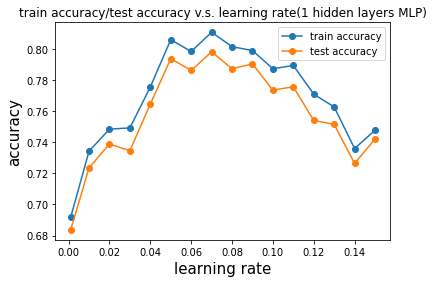

In [ ]:
lr1 = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
trainacc1 = [0.6917, 0.7343, 0.7485, 0.7493, 0.7757, 0.8061, 0.7985, 0.8109, 0.8016, 0.7991, 0.7874, 0.7895, 0.7710, 0.7628, 0.7360, 0.7478]
testacc1 = [0.6836, 0.7236, 0.7389, 0.7346, 0.7647, 0.7939, 0.7863, 0.7983, 0.7874, 0.7905, 0.7736, 0.7758, 0.7541, 0.7516, 0.7264, 0.7421]
plt.plot(lr1, trainacc1, marker='o', label='train accuracy')
plt.plot(lr1, testacc1, marker='o', label='test accuracy')
plt.legend()
plt.xlabel('learning rate', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('train accuracy/test accuracy v.s. learning rate(1 hidden layers MLP)')

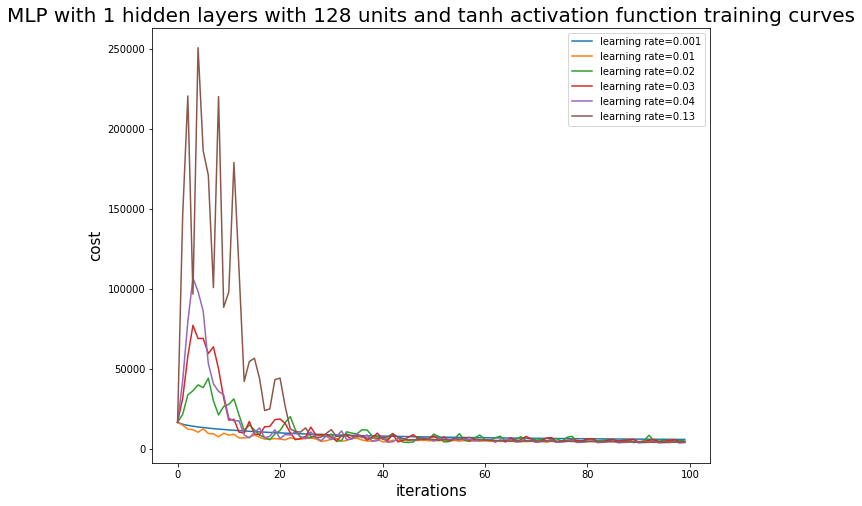

In [ ]:
x = list(range(0,100))
plt.figure(figsize=(10, 8))
plt.plot(x, cost_list_10001)
plt.plot(x, cost_list_1001)
plt.plot(x, cost_list_1002)
plt.plot(x, cost_list_1003)
plt.plot(x, cost_list_1004)
plt.plot(x, cost_list_1013)
plt.xlabel("iterations", fontsize=15)
plt.ylabel("cost", fontsize=15)
plt.title("MLP with 1 hidden layers with 128 units and tanh activation function training curves", fontsize=20)
plt.legend(['learning rate=0.001', 'learning rate=0.01','learning rate=0.02','learning rate=0.03','learning rate=0.04', 'learning rate=0.13'])

In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=1000, learning_rate=0.07)
parameters, cost_list_best1007 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 100 iteration is: 3292.6213159166837
Cost after 200 iteration is: 3001.0837859047606
Cost after 300 iteration is: 2892.1037548982213
Cost after 400 iteration is: 2852.94790767856
Cost after 500 iteration is: 2800.264641503516
Cost after 600 iteration is: 2804.2672407050995
Cost after 700 iteration is: 2747.0194351573923
Cost after 800 iteration is: 2725.108199896491
Cost after 900 iteration is: 2694.7096671969466
The train accruacy is 84.00166666666667
The test accuracy is 82.14


Text(0.5, 1.0, 'MLP with best performance training curves')

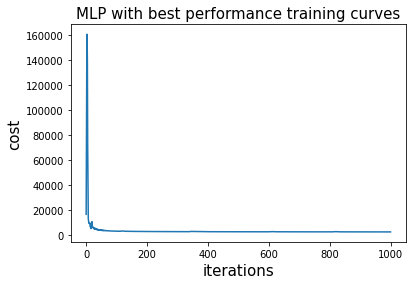

In [ ]:
x = list(range(0,1000))
plt.plot(x, cost_list_best1007)
plt.xlabel("iterations", fontsize=15)
plt.ylabel("cost", fontsize=15)
plt.title("MLP with best performance training curves", fontsize=15)

In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=1000, learning_rate=0.09)
parameters, cost_list_best1009 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 100 iteration is: 3433.988874525903
Cost after 200 iteration is: 3122.89760699777
Cost after 300 iteration is: 3108.5024494158406
Cost after 400 iteration is: 2952.72588263013
Cost after 500 iteration is: 2899.402495011267
Cost after 600 iteration is: 2837.8244420557226
Cost after 700 iteration is: 2807.0634858183116
Cost after 800 iteration is: 2786.9169724804983
Cost after 900 iteration is: 2787.2904471608877
The train accruacy is 83.955
The test accuracy is 82.21000000000001


In [ ]:
mlp = MLP(784, [128], 10, act_fun='tanh', epochs=1000, learning_rate=0.08)
parameters, cost_list_tanh1008 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 16725.692904214957
Cost after 100 iteration is: 3425.2123829148377
Cost after 200 iteration is: 3104.9579031068406
Cost after 300 iteration is: 2975.503977823214
Cost after 400 iteration is: 3055.2349381770896
Cost after 500 iteration is: 2850.1130801663658
Cost after 600 iteration is: 2848.5085825730425
Cost after 700 iteration is: 2872.892538645493
Cost after 800 iteration is: 2810.5541953497695
Cost after 900 iteration is: 2895.498729109436
The train accruacy is 84.24833333333333
The test accuracy is 82.46


In [ ]:
mlp = MLP(784, [128], 10, act_fun='relu', epochs=1000, learning_rate=0.08)
parameters, cost_list_relu1008 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15977.29734054028
Cost after 100 iteration is: 3759.164186006357
Cost after 200 iteration is: 3204.808987473642
Cost after 300 iteration is: 3045.8951559081834
Cost after 400 iteration is: 2939.094631328237
Cost after 500 iteration is: 2860.66198789579
Cost after 600 iteration is: 2796.0401494712305
Cost after 700 iteration is: 2741.279198936729
Cost after 800 iteration is: 2691.897709661897
Cost after 900 iteration is: 2647.3523352779716
The train accruacy is 84.42
The test accuracy is 82.63000000000001


In [ ]:
mlp = MLP(784, [128], 10, act_fun='leakyrelu', epochs=1000, learning_rate=0.08)
parameters, cost_list_relu1008 = mlp.fit(norm_train_X, train_y)
print("The train accruacy is", mlp.evaluate_acc(parameters, norm_train_X, train_y))
print("The test accuracy is", mlp.evaluate_acc(parameters, norm_test_X, test_y))

Cost after 0 iteration is: 15986.454092326627
Cost after 100 iteration is: 3815.0405933012735
Cost after 200 iteration is: 3207.885953749362
Cost after 300 iteration is: 3039.6032368535957
Cost after 400 iteration is: 2929.518444019584
Cost after 500 iteration is: 2848.1899860734216
Cost after 600 iteration is: 2783.9716971353337
Cost after 700 iteration is: 2728.974881466651
Cost after 800 iteration is: 2680.3665445884812
Cost after 900 iteration is: 2637.531946866433
The train accruacy is 84.5
The test accuracy is 82.61


Text(0.5, 1.0, 'MLP with best performance training curves')

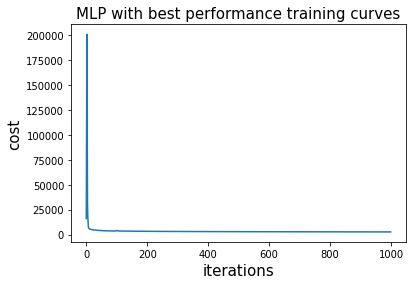

In [ ]:
x = list(range(0,1000))
plt.plot(x, cost_list_relu1008)
plt.xlabel("iterations", fontsize=15)
plt.ylabel("cost", fontsize=15)
plt.title("MLP with best performance training curves", fontsize=15)